In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak
from dask.distributed import Client, performance_report
# local
sidm_path = str(sys.path[0]).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import utilities, sidm_processor, scaleout, cutflow
# always reload local modules to pick up changes during development
importlib.reload(utilities)
importlib.reload(sidm_processor)
importlib.reload(scaleout)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
from tqdm.notebook import tqdm

In [2]:
samples_2mu2e = [
    "2Mu2E_500GeV_5p0GeV_0p08mm",
]

samples_4mu = [
    "4Mu_500GeV_5p0GeV_0p08mm",
]

samples_bkg = [
    "TTJets",
]

In [3]:
fileset_2mu2e = utilities.make_fileset(samples_2mu2e, "llpNanoAOD_v2", max_files=1, location_cfg="signal_2mu2e_v10.yaml")
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v2", max_files=1, location_cfg="signal_4mu_v10.yaml")
fileset_bkg = utilities.make_fileset(samples_bkg, "skimmed_llpNanoAOD_v2", max_files=1, location_cfg="backgrounds.yaml")

fileset_2mu2e['4Mu_500GeV_5p0GeV_0p08mm'] = fileset_4mu['4Mu_500GeV_5p0GeV_0p08mm']
fileset_2mu2e['TTJets'] = fileset_bkg['TTJets']

runner = processor.Runner(
    # executor=processor.DaskExecutor(client=client),
    executor=processor.IterativeExecutor(),
    # executor=processor.FuturesExecutor(), 
    schema=NanoAODSchema,
#    maxchunks=10, 
    skipbadfiles=True
)

channels = [
    "base",
]

p = sidm_processor.SidmProcessor(
    channels,
    ["isolation_base"],
    lj_reco_choices=["0.4"],
    unweighted_hist=True,
)

output = runner.run(fileset_2mu2e, treename="Events", processor_instance=p)
out = output["out"]

Output()

Output()

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in
divide
  result = getattr(ufunc, method)(

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


Warning: a histogram with the name jet_lj_dR_7 could not be filled and will be skipped

Warning: a histogram with the name jet_lj_dR_8 could not be filled and will be skipped

Warning: a histogram with the name jet_lj_dR_3 could not be filled and will be skipped

Warning: a histogram with the name jet_lj_dR_4 could not be filled and will be skipped

Warning: a histogram with the name jet_lj_dR_5 could not be filled and will be skipped

Warning: a histogram with the name jet_lj_dR_6 could not be filled and will be skipped

Warning: a histogram with the name jet_lj_dR_7 could not be filled and will be skipped

Warning: a histogram with the name jet_lj_dR_8 could not be filled and will be skipped

Warning: a histogram with the name jet_lj_dR_9 could not be filled and will be skipped

Warning: a histogram with the name jet_lj_dR_3 could not be filled and will be skipped

Warning: a histogram with the name jet_lj_dR_4 could not be filled and will be skipped

Warning: a histogram with the name jet_lj_dR_5 could not be filled and will be skipped

Warning: a histogram with the name jet_lj_dR_6 could not be filled and will be skipped

Warning: a histogram with the name jet_lj_dR_7 could not be filled and will be skipped

Warning: a histogram with the name jet_lj_dR_8 could not be filled and will be skipped

Warning: a histogram with the name jet_lj_dR_9 could not be filled and will be skipped

Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb


In [4]:
samples_all = [
    "2Mu2E_500GeV_5p0GeV_0p08mm",
    "4Mu_500GeV_5p0GeV_0p08mm",
    "TTJets",
]

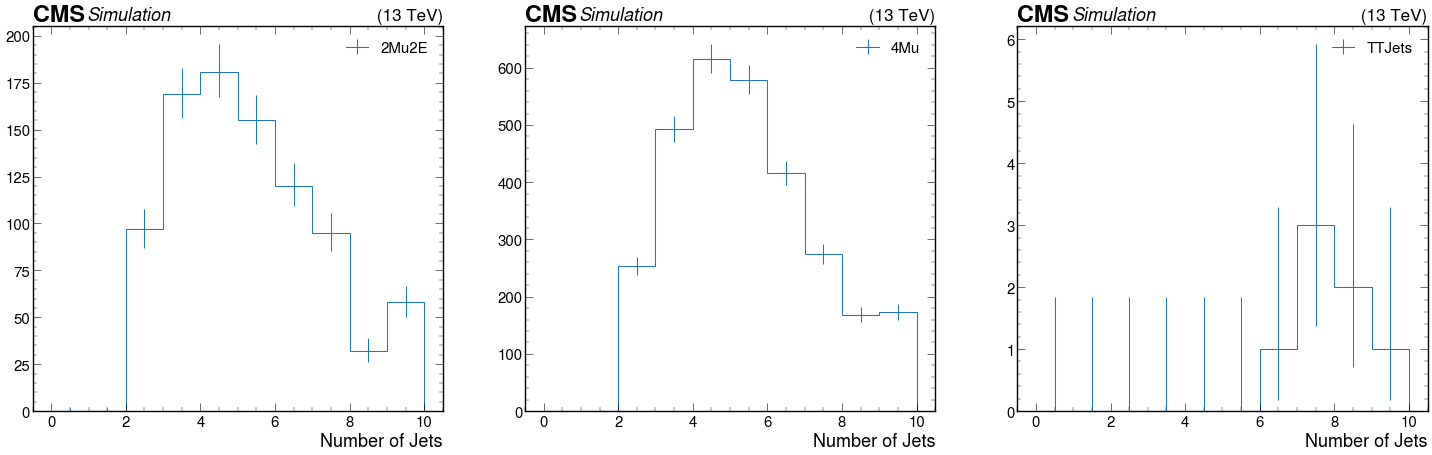

In [5]:
plt.subplots(1,3,figsize=(36,10))

plt.subplot(1,3,1)
for sample in samples_2mu2e:
    utilities.plot(out["2Mu2E_500GeV_5p0GeV_0p08mm"]["hists"]["jet_n"][channels[0], :], density=False, label="2Mu2E")
plt.legend()

plt.subplot(1,3,2)
for sample in samples_4mu:
    utilities.plot(out["4Mu_500GeV_5p0GeV_0p08mm"]["hists"]["jet_n"][channels[0], :], density=False, label="4Mu")
plt.legend()

plt.subplot(1,3,3)
for sample in samples_bkg:
    utilities.plot(out["TTJets"]["hists"]["jet_n"][channels[0], :], density=False, label="TTJets")
plt.legend()

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/

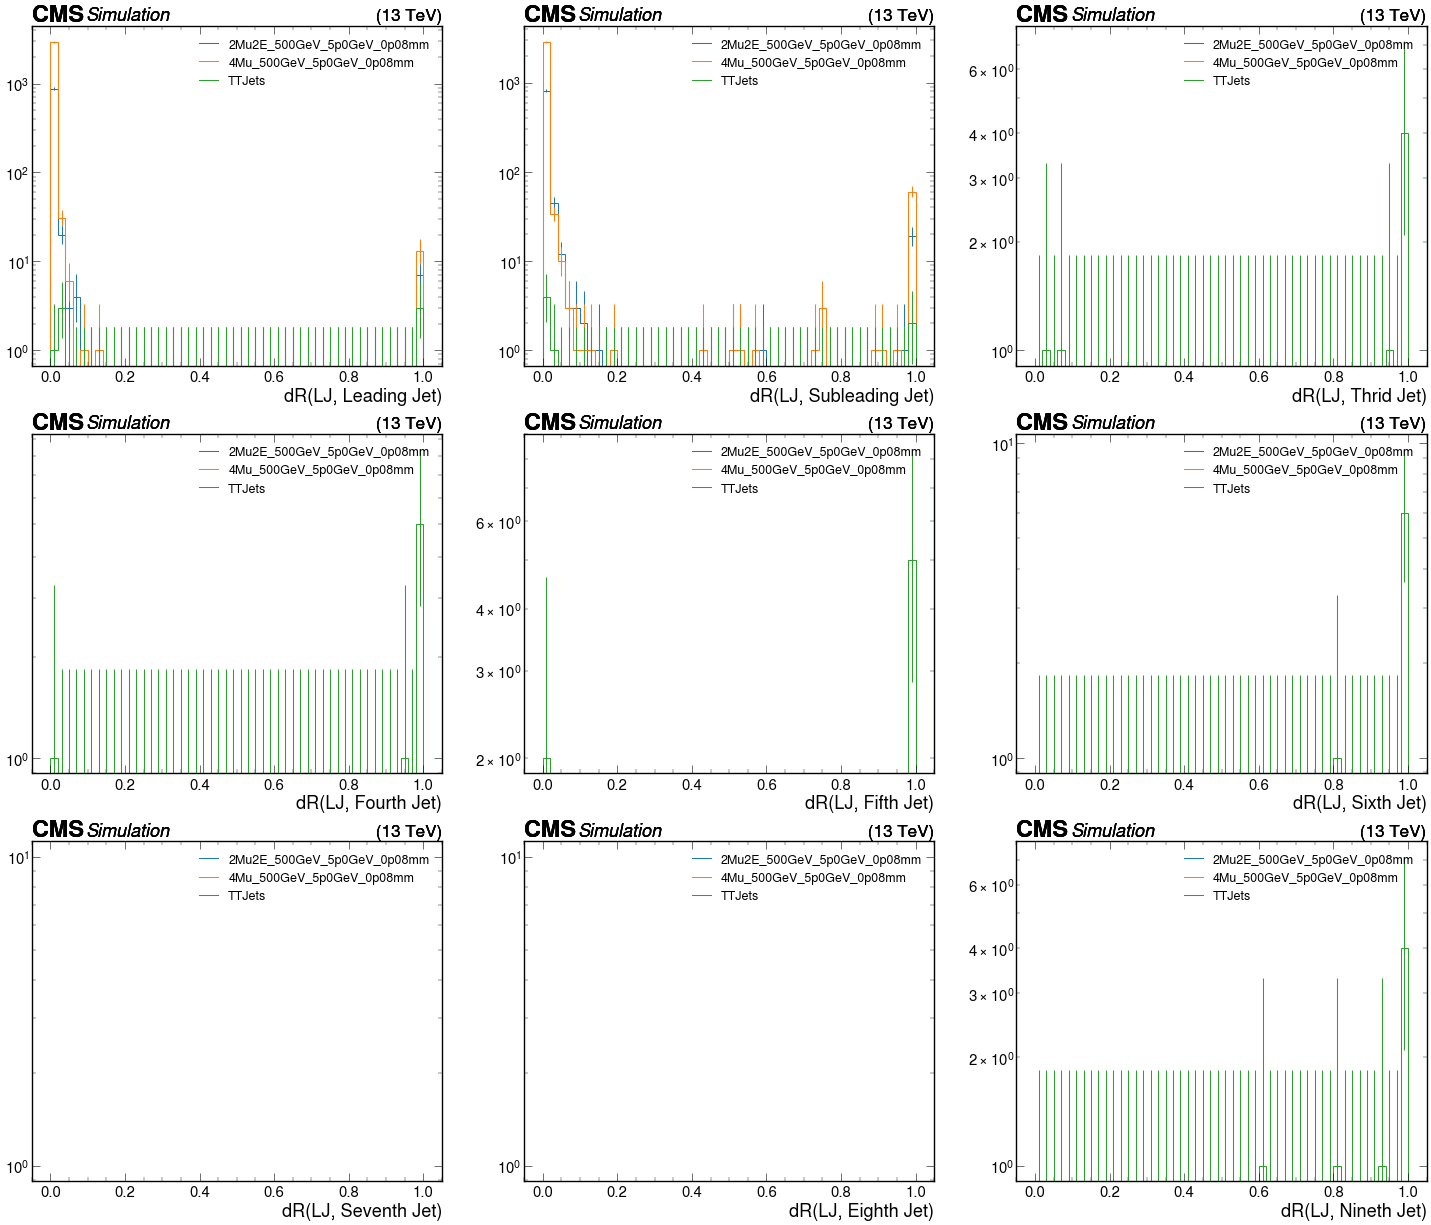

In [6]:
plt.subplots(3,3,figsize=(36,30))

plt.subplot(3,3,1)
for sample in samples_all:
    utilities.plot(out[sample]["hists"]["jet_lj_dR_1"][channels[0], :], density=False, label="2Mu2E")
plt.legend(samples_all, loc=1, prop={'size': 18})
plt.yscale("log")

plt.subplot(3,3,2)
for sample in samples_all:
    utilities.plot(out[sample]["hists"]["jet_lj_dR_2"][channels[0], :], density=False, label="4Mu")
plt.legend(samples_all, loc=1, prop={'size': 18})
plt.yscale("log")

plt.subplot(3,3,3)
for sample in samples_all:
    utilities.plot(out[sample]["hists"]["jet_lj_dR_3"][channels[0], :], density=False, label="TTJets")
plt.legend(samples_all, loc=1, prop={'size': 18})
plt.yscale("log")

plt.subplot(3,3,4)
for sample in samples_all:
    utilities.plot(out[sample]["hists"]["jet_lj_dR_4"][channels[0], :], density=False, label="2Mu2E")
plt.legend(samples_all, loc=1, prop={'size': 18})
plt.yscale("log")

plt.subplot(3,3,5)
for sample in samples_all:
    utilities.plot(out[sample]["hists"]["jet_lj_dR_5"][channels[0], :], density=False, label="4Mu")
plt.legend(samples_all, loc=1, prop={'size': 18})
plt.yscale("log")

plt.subplot(3,3,6)
for sample in samples_all:
    utilities.plot(out[sample]["hists"]["jet_lj_dR_6"][channels[0], :], density=False, label="TTJets")
plt.legend(samples_all, loc=1, prop={'size': 18})
plt.yscale("log")

plt.subplot(3,3,7)
for sample in samples_all:
    utilities.plot(out[sample]["hists"]["jet_lj_dR_7"][channels[0], :], density=False, label="2Mu2E")
plt.legend(samples_all, loc=1, prop={'size': 18})
plt.yscale("log")

plt.subplot(3,3,8)
for sample in samples_all:
    utilities.plot(out[sample]["hists"]["jet_lj_dR_8"][channels[0], :], density=False, label="4Mu")
plt.legend(samples_all, loc=1, prop={'size': 18})
plt.yscale("log")

plt.subplot(3,3,9)
for sample in samples_all:
    utilities.plot(out[sample]["hists"]["jet_lj_dR_9"][channels[0], :], density=False, label="TTJets")
plt.legend(samples_all, loc=1, prop={'size': 18})
plt.yscale("log")